In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [3]:
df=pd.read_csv("fiat500.csv")
df

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700
...,...,...,...,...,...,...,...,...,...
1533,1534,sport,51,3712,115280,1,45.069679,7.704920,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.666870,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.413480,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.682270,5990


In [4]:
df.shape #returns no.of rows and columns

(1538, 9)

In [18]:
df.isna().sum()

ID                 0
model              0
engine_power       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64

In [6]:
co=df.drop(columns=['ID','model','lat','lon'])
co.corr()

,engine_power,age_in_days,km,previous_owners,price
engine_power,1.000000,0.319190,0.285495,-0.005030,-0.277235
age_in_days,0.319190,1.000000,0.833890,0.075775,-0.893328
km,0.285495,0.833890,1.000000,0.097539,-0.859373
previous_owners,-0.005030,0.075775,0.097539,1.000000,-0.076274
price,-0.277235,-0.893328,-0.859373,-0.076274,1.000000


In [7]:
df['model'].unique() #unique column values

array(['lounge', 'pop', 'sport'], dtype=object)

In [8]:
sports=df.loc[df['model']=="sport"]
print(sports.to_string())

        ID  model  engine_power  age_in_days      km  previous_owners        lat        lon  price
2        3  sport            74         4658  142228                1  45.503300  11.417840   4200
8        9  sport            73         4049   76000                1  45.548000  11.549470   5600
9       10  sport            51         3653   89000                1  45.438301  10.991700   6000
27      28  sport            51         3531  100000                1  40.976452  14.172280   4950
33      34  sport            51         3927  140000                2  40.755932  14.690190   5200
38      39  sport            51          790   43100                1  45.334080  11.376870   9950
40      41  sport            51         4139  119000                1  45.349319   7.742600   4890
48      49  sport            51         3684  160000                1  45.405472  10.278290   4900
49      50  sport            51         4596  107000                1  40.845901  14.369270   4300
51      52

In [9]:
pop=df.loc[df['model']=="pop"]
lounge=df.loc[df['model']=="lounge"]
print(pop.shape)
print(lounge.shape)

(358, 9)
(1094, 9)


In [10]:
sports.drop(columns=['ID','model','lat','lon','engine_power']).describe()

,age_in_days,km,previous_owners,price
count,86.000000,86.000000,86.000000,86.000000
mean,3310.372093,103382.802326,1.267442,6275.406977
std,1165.134994,43041.072473,0.602435,1916.322860
min,517.000000,6200.000000,1.000000,3800.000000
25%,3020.750000,72425.000000,1.000000,4892.500000
50%,3684.000000,102400.000000,1.000000,5800.000000
75%,4139.000000,129973.000000,1.000000,6900.000000
max,4658.000000,190000.000000,4.000000,10800.000000


In [11]:
lounge.drop(columns=['ID','model','lat','lon','engine_power']).describe()

,age_in_days,km,previous_owners,price
count,1094.000000,1094.000000,1094.000000,1094.000000
mean,1437.570384,46873.445155,1.117002,8949.486289
std,1203.670113,37051.887997,0.406966,1798.159691
min,366.000000,1232.000000,1.000000,2900.000000
25%,640.000000,18826.500000,1.000000,7800.000000
50%,790.000000,33105.500000,1.000000,9500.000000
75%,2192.000000,67000.000000,1.000000,10400.000000
max,4658.000000,235000.000000,4.000000,11100.000000


In [12]:
pop.drop(columns=['ID','model','lat','lon','engine_power']).describe()

,age_in_days,km,previous_owners,price
count,358.000000,358.000000,358.000000,358.000000
mean,1904.508380,61320.100559,1.108939,7987.349162
std,1238.086949,38277.729326,0.384400,1838.241284
min,366.000000,3000.000000,1.000000,2500.000000
25%,790.000000,30000.000000,1.000000,6900.000000
50%,1751.000000,54099.000000,1.000000,7999.500000
75%,2769.000000,85875.000000,1.000000,9500.000000
max,4658.000000,201000.000000,4.000000,11090.000000


In [13]:
x=sports.drop(columns=['ID','model','lat','lon','engine_power','price'])
y=sports['price']
x

,age_in_days,km,previous_owners
2,4658,142228,1
8,4049,76000,1
9,3653,89000,1
27,3531,100000,1
33,3927,140000,2
...,...,...,...
1498,1400,60000,1
1501,3774,161900,1
1504,4322,95000,1
1531,4505,127000,1


In [14]:
a=lounge.drop(columns=['ID','model','lat','lon','engine_power','price'])
b=lounge['price']
c=pop.drop(columns=['ID','model','lat','lon','engine_power','price'])
d=pop['price']

In [15]:
#import model
from sklearn.linear_model import LinearRegression

In [16]:
model=LinearRegression()
model.fit(x,y)
model1=LinearRegression()
model1.fit(a,b)
model2=LinearRegression()
model2.fit(c,d)

LinearRegression()

In [21]:
def price(tot,ty):
    prices=[]
    for i in range(tot):
        if ty=="sport" or ty=="lounge" or ty=="pop":
            print(f"Car {i+1} :")
            days=int(input("No. of Days old : "))
            kms=int(input("No. of Kilometers driven : "))
            prev=int(input("No. of Previous owners : "))
            if ty=="sport":
                prices.append(int(model.predict([[days,kms,prev]])[0]))
            elif ty=="lounge":
                prices.append(int(model1.predict([[days,kms,prev]])[0]))
            else:
                prices.append(int(model2.predict([[days,kms,prev]])[0]))
        else:
            print("Enter correct car type!!")
            break
        print()
    for i in range(len(prices)):
        print(f"Excepted price of Car {i+1} : $"+str(prices[i]))
n=int(input("Total no.of cars : "))
type=input("Enter car type (sport,lounge,pop) : ")
print()
price(n,type)

Total no.of cars :  1
Enter car type (sport,lounge,pop) :  sport



Car 1 :


No. of Days old :  2190
No. of Kilometers driven :  70000
No. of Previous owners :  1



Excepted price of Car 1 : $8017


In [22]:
newdf=df.drop(columns=['ID','lat','lon','engine_power','price'])
newdf

,model,age_in_days,km,previous_owners
0,lounge,882,25000,1
1,pop,1186,32500,1
2,sport,4658,142228,1
3,lounge,2739,160000,1
4,pop,3074,106880,1
...,...,...,...,...
1533,sport,3712,115280,1
1534,lounge,3835,112000,1
1535,pop,2223,60457,1
1536,lounge,2557,80750,1


In [23]:
newdf1=pd.get_dummies(newdf,dtype=int)
newdf1

,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
0,882,25000,1,1,0,0
1,1186,32500,1,0,1,0
2,4658,142228,1,0,0,1
3,2739,160000,1,1,0,0
4,3074,106880,1,0,1,0
...,...,...,...,...,...,...
1533,3712,115280,1,0,0,1
1534,3835,112000,1,1,0,0
1535,2223,60457,1,0,1,0
1536,2557,80750,1,1,0,0


In [24]:
x1=newdf1
y1=df['price']
model3=LinearRegression()
model3.fit(x1,y1)

LinearRegression()

In [25]:
type=input("Enter car type (sport,lounge,pop) : ")
days=int(input("No. of Days old : "))
kms=int(input("No. of Kilometers driven : "))
prev=int(input("No. of Previous owners : "))
if type=="sport":
    print(f"Excepted price of {type} car  : $"+str(int(model3.predict([[days,kms,prev,0,0,1]])[0])))
elif type=="pop":
    print(f"Excepted price of {type} car  : $"+str(int(model3.predict([[days,kms,prev,0,1,0]])[0])))
elif type=="lounge":
    print(f"Excepted price of {type} car  : $"+str(int(model3.predict([[days,kms,prev,1,0,0]])[0])))
else:
    print("Enter correct car type!!")

Enter car type (sport,lounge,pop) :  sport
No. of Days old :  2190
No. of Kilometers driven :  70000
No. of Previous owners :  1


Excepted price of sport car  : $7842


In [26]:
# train_test_split package
from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test = train_test_split(x1,y1,test_size=0.33)
X_train,X_test,Y_train,Y_test = train_test_split(x1,y1,test_size=0.33,random_state=2)


In [27]:
print(X_train.shape)
print(X_test.shape)

(1030, 6)
(508, 6)


In [30]:
reg_model = LinearRegression()
reg_model.fit(X_train,Y_train)
reg_model.predict(X_test)

array([ 8485.30498755,  8485.30498755,  7590.94820976,  8277.60998491,
        7634.29578981, 10028.28988159,  8824.00888774,  8581.26474043,
       10066.60373489,  9994.55455883,  8694.0774266 , 10371.51137992,
        6245.40230452,  6427.63933934,  9744.97688682,  8115.84646346,
       10423.68400219, 10218.15031923,  5099.06315833,  9589.658978  ,
        5863.28418035,  5708.68039056,  5506.6667481 , 10098.98511628,
        8972.74258156,  9670.66623163,  7638.937311  , 10407.52584139,
       10519.88460899,  6905.54089795,  9833.59807121,  6426.18727215,
        9599.30195224,  8850.96449033,  9830.17673236,  3257.8746781 ,
        7826.9949628 ,  7857.20454628,  7685.98914845,  4408.19575418,
        8451.66375833,  7395.36792887,  5902.4983637 ,  9696.24363125,
       10519.88460899,  9283.71381232,  8634.41137944, 10068.39244713,
       10517.75749893, 10358.51204859,  7832.0223522 ,  4165.58276673,
        7014.31879742,  7468.6977675 ,  9300.94825834,  7079.13721671,
      

In [31]:
type=input("Enter car type (sport,lounge,pop) : ")
days=int(input("No. of Days old : "))
kms=int(input("No. of Kilometers driven : "))
prev=int(input("No. of Previous owners : "))
if type=="sport":
    print(f"Excepted price of {type} car  : $"+str(int(reg_model.predict([[days,kms,prev,0,0,1]])[0])))
elif type=="pop":
    print(f"Excepted price of {type} car  : $"+str(int(reg_model.predict([[days,kms,prev,0,1,0]])[0])))
elif type=="lounge":
    print(f"Excepted price of {type} car  : $"+str(int(reg_model.predict([[days,kms,prev,1,0,0]])[0])))
else:
    print("Enter correct car type!!")

Enter car type (sport,lounge,pop) :  sport
No. of Days old :  2190
No. of Kilometers driven :  70000
No. of Previous owners :  1


Excepted price of sport car  : $7812


In [38]:
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(x1,y1,test_size=0.33,shuffle=False)
reg_model_1 = LinearRegression()
reg_model_1.fit(X_train_1,Y_train_1)
print(X_train_1.head())
ans_1=reg_model_1.predict(X_test_1)
print(ans_1)

   age_in_days      km  previous_owners  model_lounge  model_pop  model_sport
0          882   25000                1             1          0            0
1         1186   32500                1             0          1            0
2         4658  142228                1             0          0            1
3         2739  160000                1             1          0            0
4         3074  106880                1             0          1            0
[ 6681.77392497  6965.71153222  8434.67930027 10015.75503687
  9498.46557918  8223.07674122  8066.24982832  9738.97962386
  9734.31980842  9552.66256318  9361.17552096  9842.4604127
  7752.6581685   4512.22537973  9384.37023437 10072.49336954
  9876.68161201  8386.89209337 10283.14353456  7466.80566231
  9457.8548407   5707.31048091 10116.07847892  9907.58500112
 10069.82682889 10483.84491544  9331.11249721  6876.88039009
  4659.13714728  4684.55618411  6815.07828984  9506.08693143
  9782.73115535  9438.00903778 10077.43187682

In [34]:
X_train_2,X_test_2,Y_train_2,Y_test_2 = train_test_split(x1,y1,test_size=0.15,shuffle=False)
reg_model_2 = LinearRegression()
reg_model_2.fit(X_train_2,Y_train_2)
ans_2=reg_model_2.predict(X_test_2)
print(ans_2)

[ 8882.07204103  6854.00303028  9717.65068142  9544.52329946
  9848.22228343  9895.92827688  6032.21434202  8843.34513306
  9992.17532703 10506.84668801  9991.17206281  7357.29461396
 10061.46047176  9782.73755937  9950.04166059  4898.42099372
  6221.56187012  9950.88922073  9948.25421422  4556.49294842
  6958.60077965  9992.17532703  4829.07487707  3982.9857888
  7979.18899753  9737.60361156  7847.29611021 10434.13005442
 10509.5037471   8495.42149118  9874.03262812  9844.41561504
  5284.57875395  8836.42722371  8463.38229446  7453.25730313
 10402.28320271  9803.82966738  8198.33351382  9981.64235938
  8729.82112638 10418.27341142 10125.01095337  8649.16883865
  9846.69661724  9907.35729188  8056.14095519  8885.89236324
  9805.89790337  7053.25440504  7641.82278739  9873.37604644
 10040.89360508  9964.32861946  6564.85604514 10488.17977913
  8521.59920298  7514.39903672  9952.83478416  9812.02886843
  5502.12483598  8869.28145831  9805.89790337 10102.70595993
  5043.80108085  9925.791

<bound method DataFrame.to_string of           KM         PRICE
1030   91000   6681.773925
1031  110000   6965.711532
1032   33530   8434.679300
1033   26500  10015.755037
1034   56779   9498.465579
...      ...           ...
1533  115280   5716.733447
1534  112000   5694.015223
1535   60457   7670.019534
1536   80750   7383.160635
1537   54276   8188.728368

[508 rows x 2 columns]>


<Axes: xlabel='KM', ylabel='PRICE'>

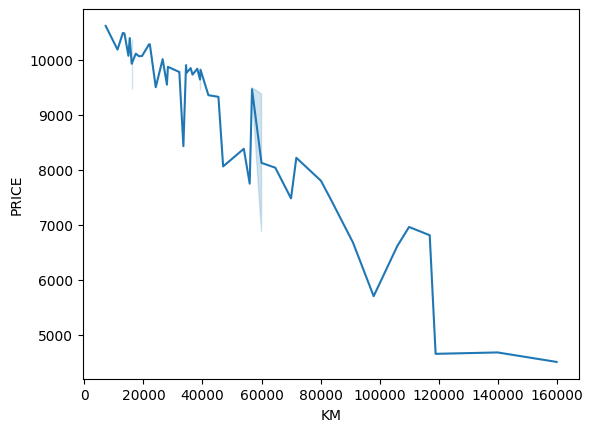

In [42]:
# data visualization
import seaborn as sns
import matplotlib as plt
result = pd.DataFrame(columns=['KM','PRICE'])
result['KM'] = X_test_1['km']
result['PRICE'] = ans_1
print(result.to_string)
sns.lineplot(x='KM',y='PRICE',data=result.head(50))

<bound method DataFrame.to_string of           KM        PRICE
1307   58684  8882.072041
1308   35473  6854.003030
1309   37000  9717.650681
1310   29500  9544.523299
1311   34031  9848.222283
...      ...          ...
1533  115280  5737.207134
1534  112000  5705.981267
1535   60457  7678.689740
1536   80750  7385.791129
1537   54276  8193.769558

[231 rows x 2 columns]>


<Axes: xlabel='KM', ylabel='PRICE'>

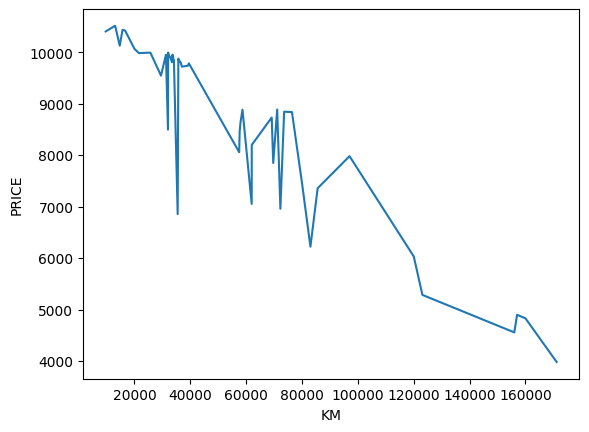

In [43]:
result_1 = pd.DataFrame(columns=['KM','PRICE'])
result_1['KM'] = X_test_2['km']
result_1['PRICE'] = ans_2
print(result_1.to_string)
sns.lineplot(x='KM',y='PRICE',data=result_1.head(50))

<Axes: xlabel='KM', ylabel='PRICE'>

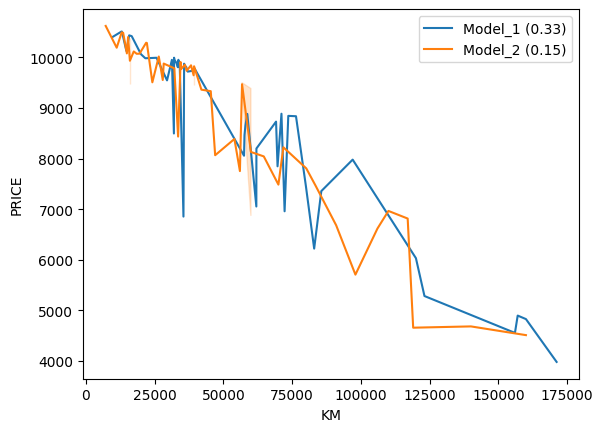

In [44]:
sns.lineplot(x='KM',y='PRICE',data=result_1.head(50),label="Model_1 (0.33)")
sns.lineplot(x='KM',y='PRICE',data=result.head(50),label="Model_2 (0.15)")

In [41]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
hire = pd.read_csv("hiring.csv")
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [42]:
hire['experience'].fillna(0,inplace=True)
hire['test_score(out of 10)'].fillna(hire['test_score(out of 10)'].mean(),inplace=True)
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [46]:
word_to_num = {'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9,'ten' : 10, 'eleven' : 11}
hire['experience'].replace(word_to_num, inplace=True)
hire
# Install the word2number library
# !pip install word2number

# # Import the library
# from word2number import w2n

# # Convert words to numbers
# hire['experience'] = hire['experience'].apply(w2n.word_to_num)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [25]:
hire.corr()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
experience,1.000000,-0.241897,-0.29048,0.908017
test_score(out of 10),-0.241897,1.000000,0.13971,-0.002850
interview_score(out of 10),-0.290480,0.139710,1.00000,0.037820
salary($),0.908017,-0.002850,0.03782,1.000000


In [28]:
X=hire.drop(columns=['salary($)'])
Y=hire['salary($)']
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.000000,9
1,0,8.000000,6
2,5,6.000000,7
3,2,10.000000,10
4,7,9.000000,6
5,3,7.000000,10
6,10,7.857143,7
7,11,7.000000,8


In [31]:
from sklearn.linear_model import LinearRegression
model_4=LinearRegression()
model_4.fit(X,Y)

LinearRegression()

In [47]:
# train_test_split package
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(X,Y,test_size=0.33)
reg_model_1 = LinearRegression()
reg_model_1.fit(X_train_1,Y_train_1)

LinearRegression()

In [48]:
exp = int(input("Enter experience in yrs:"))
ts= int(input("test_score(out of 10):"))
its = int(input("interview_score(out of 10)"))
print(f"Excepted price: $"+str(int(reg_model_1.predict([[exp,ts,its]])[0])))

Enter experience in yrs: 2
test_score(out of 10): 9
interview_score(out of 10) 6


Excepted price: $54321
